# Богданов А.С. - Домашнее задание - Времяные ряды общая теория

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

## Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

## Определяем вспомогательные функции

In [2]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [3]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 1. Ряд "international-airline-passengers.csv" (пример из практики)

In [4]:
series = pd.read_csv("https://raw.githubusercontent.com/ab-kily/netology-hw-ts1/master/Series/international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


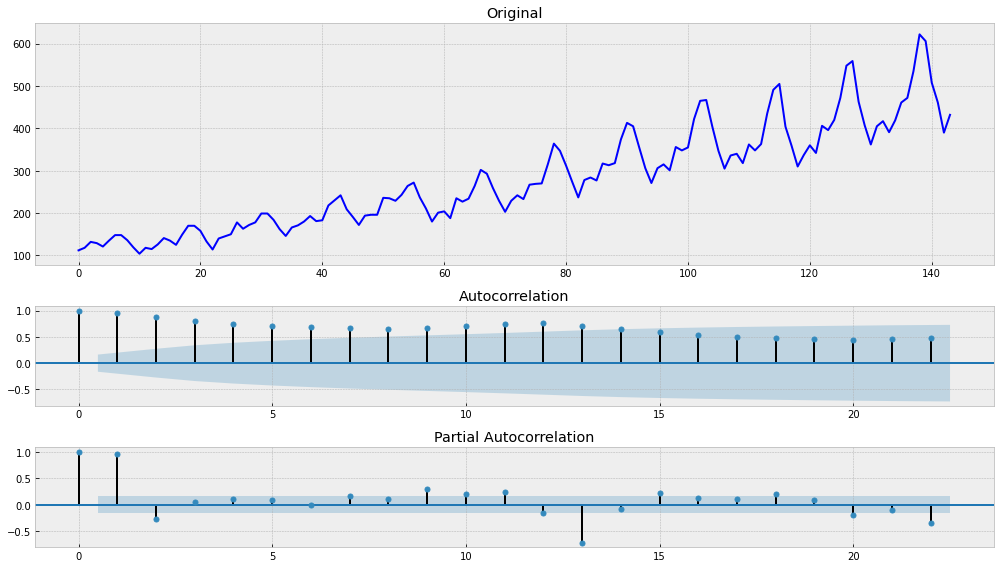

In [5]:
tsplot(series)

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

In [6]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


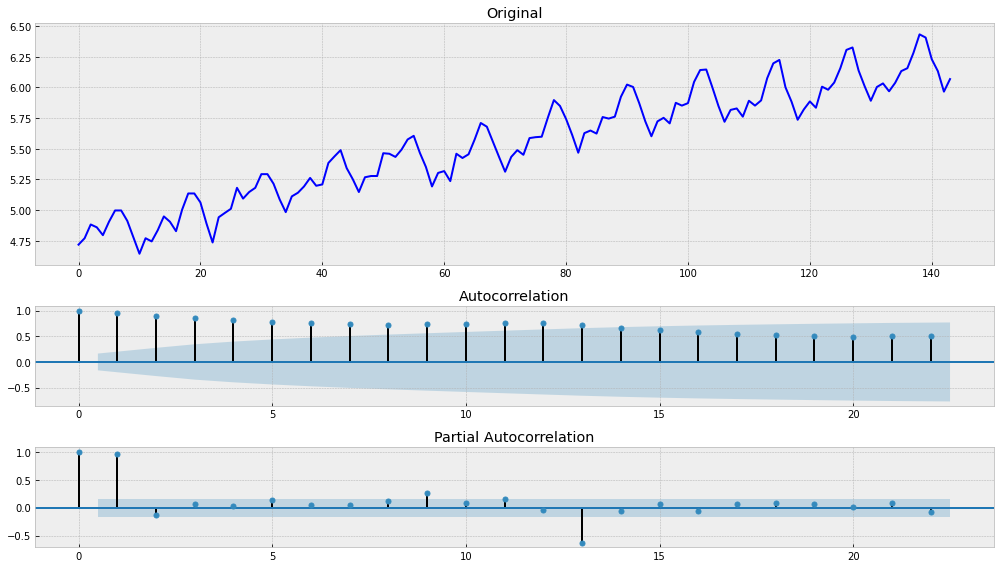

In [7]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [8]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


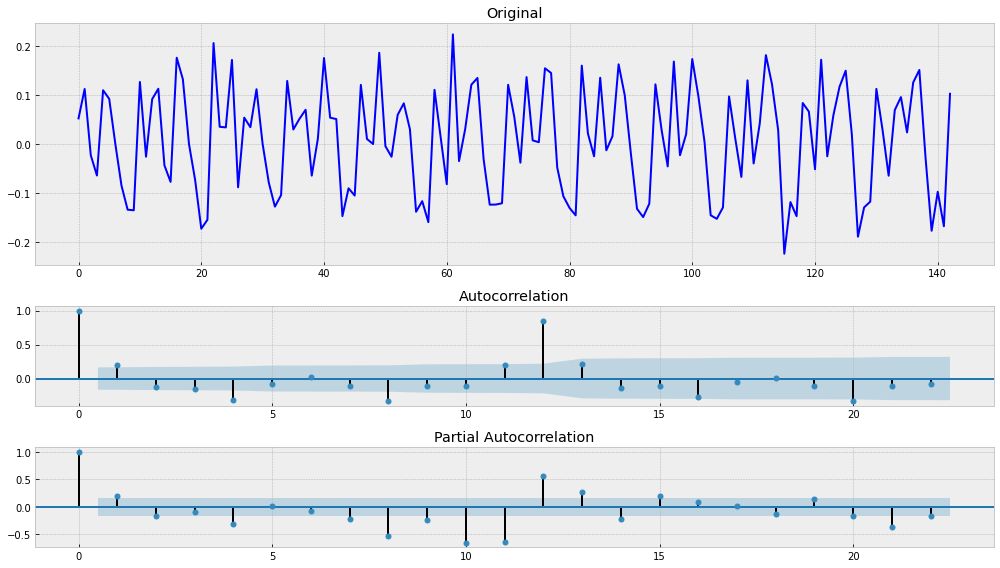

In [9]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности. Уберем ее

In [10]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


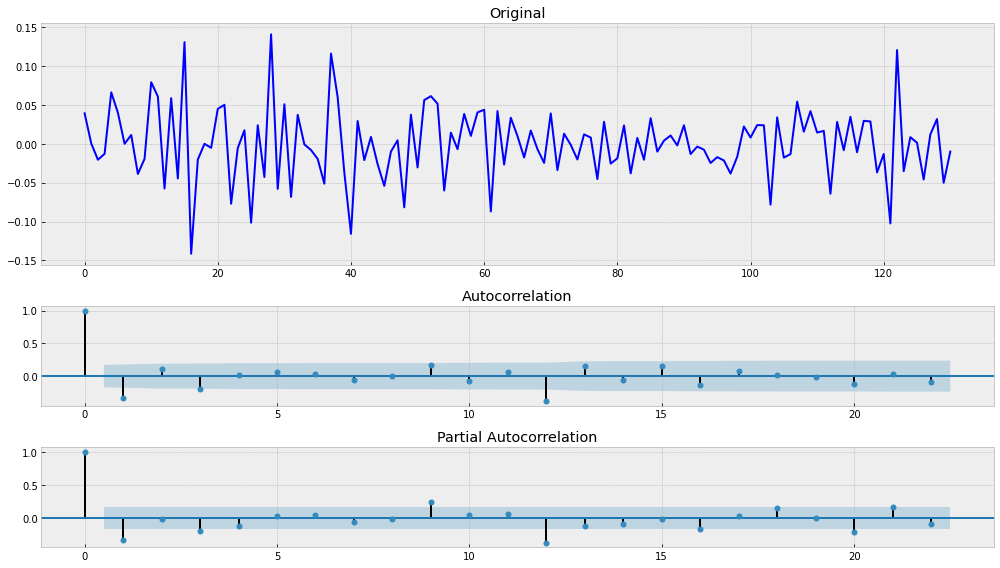

In [11]:
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

## 2. Ряд "daily-total-female-births-in-cal.csv"

In [12]:
series = pd.read_csv("https://raw.githubusercontent.com/ab-kily/netology-hw-ts1/master/Series/daily-total-female-births-in-cal.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


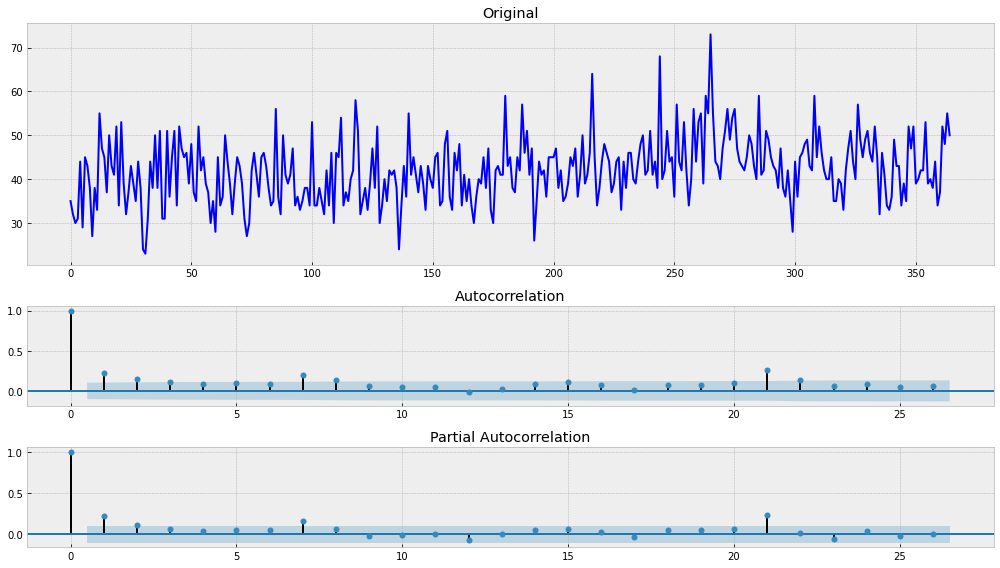

In [13]:
tsplot(series)

Тест Дики-Фуллера подтверждает, что ряд станционарен

## 3. Ряд "mean-monthly-air-temperature-deg.csv"

In [14]:
series = pd.read_csv("https://raw.githubusercontent.com/ab-kily/netology-hw-ts1/master/Series/mean-monthly-air-temperature-deg.csv")['Deg']

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


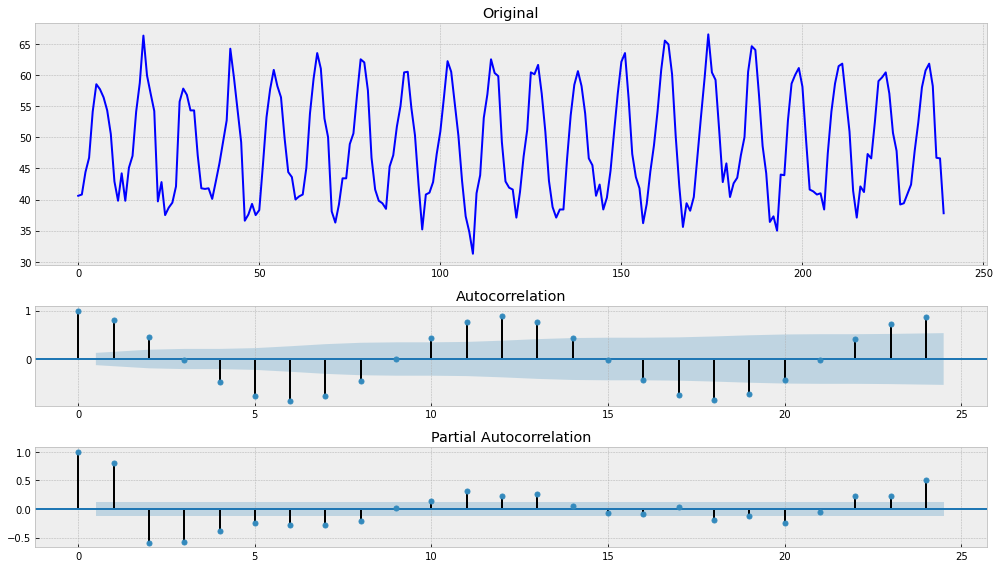

In [15]:
tsplot(series)

Тест Дики-Фуллера подтверждает, что ряд станционарен

## 4. Ряд "monthly-boston-armed-robberies-j.csv"

In [16]:
series = pd.read_csv("https://raw.githubusercontent.com/ab-kily/netology-hw-ts1/master/Series/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


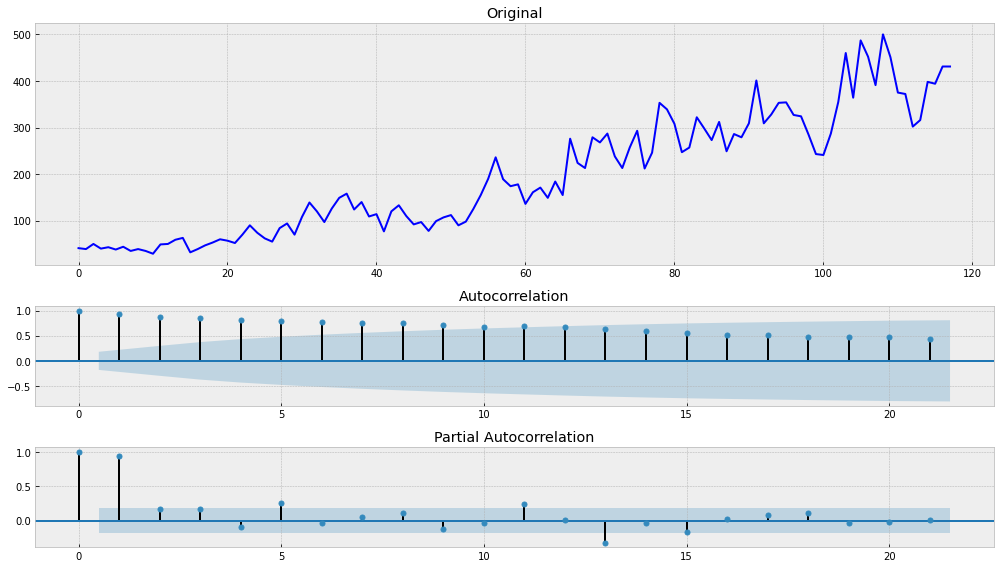

In [17]:
tsplot(series)

In [18]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


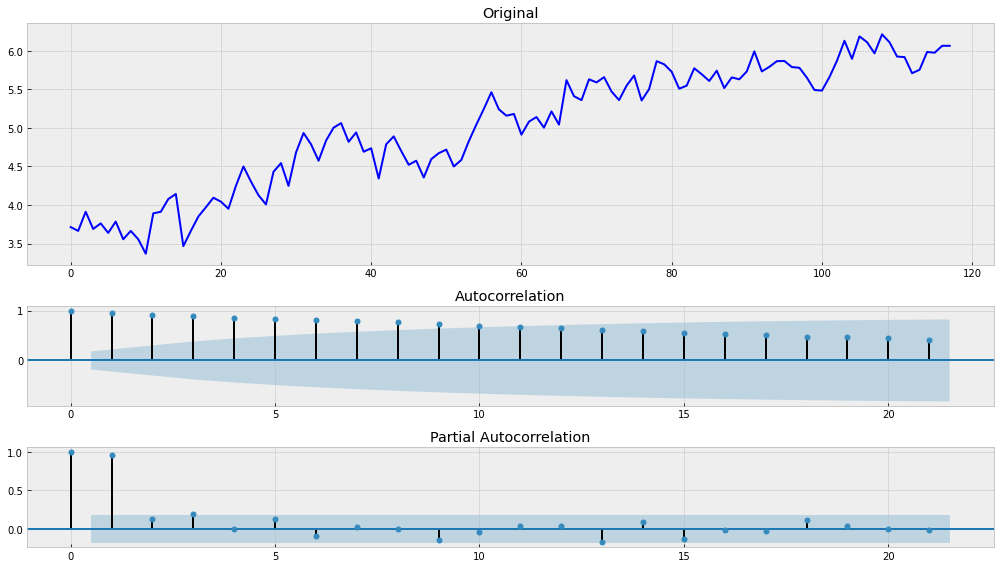

In [19]:
tsplot(series)

In [20]:
series = series[14:] - series[:-14]

Results of Dickey-Fuller Test:
Test Statistic                 -3.772830
p-value                         0.003198
#Lags Used                     13.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


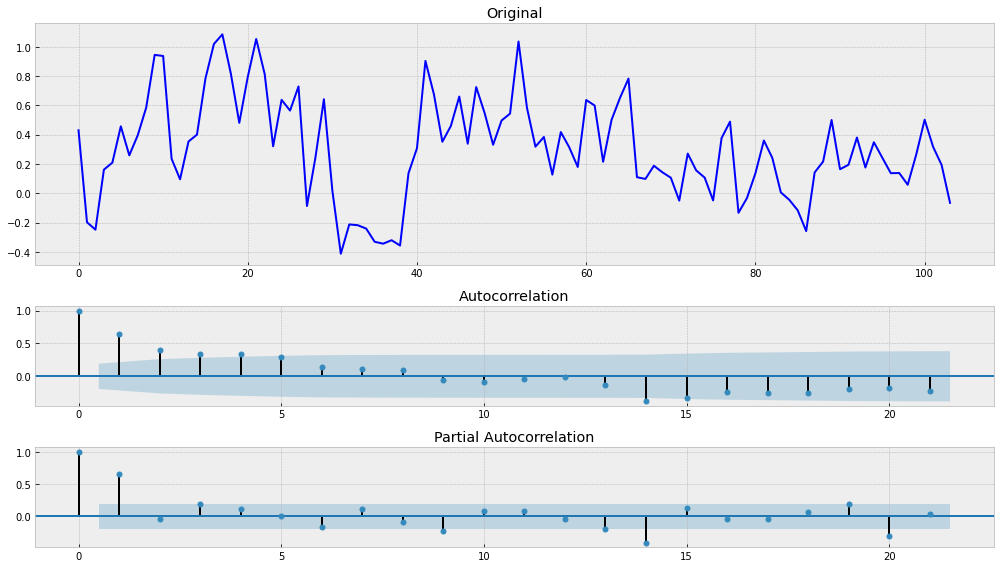

In [21]:
tsplot(series)

Тест Дики-Фуллера подтверждает, что ряд станционарен

## 5. Ряд "monthly-sales-of-company-x-jan-6.csv"

In [22]:
series = pd.read_csv("https://raw.githubusercontent.com/ab-kily/netology-hw-ts1/master/Series/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


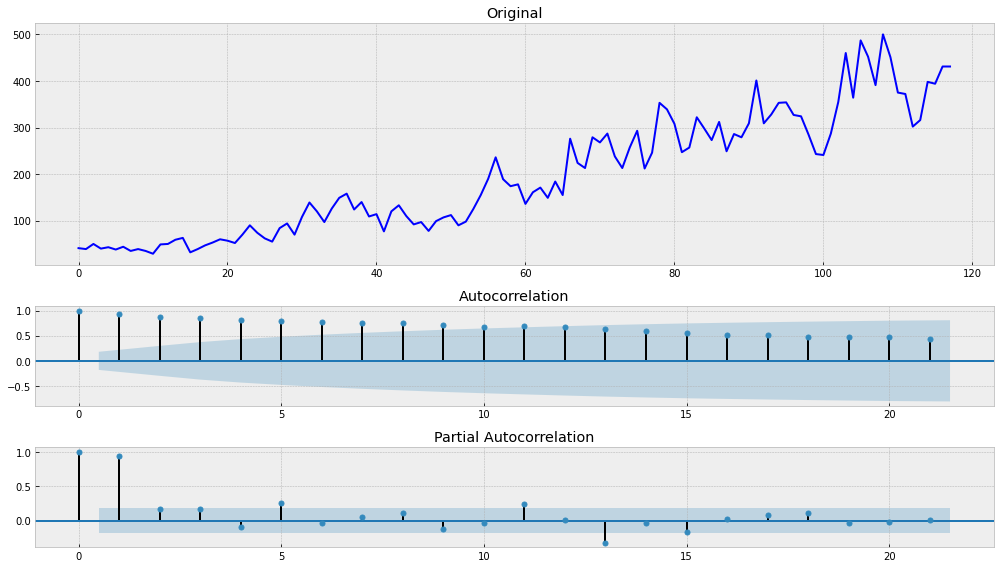

In [23]:
tsplot(series)

In [24]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


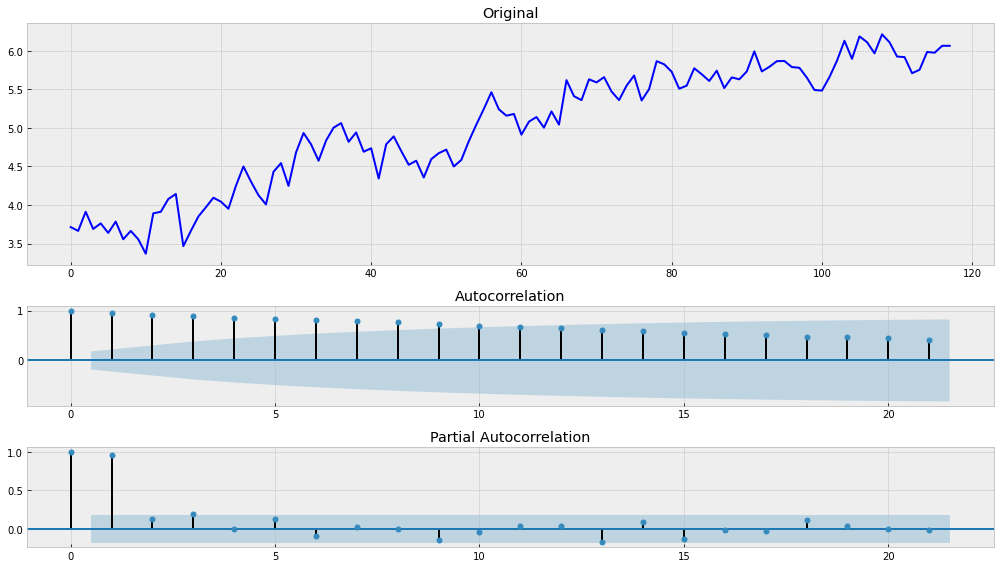

In [25]:
tsplot(series)

In [26]:
series = series[8:] - series[:-8]

Results of Dickey-Fuller Test:
Test Statistic                  -3.311186
p-value                          0.014386
#Lags Used                       8.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64


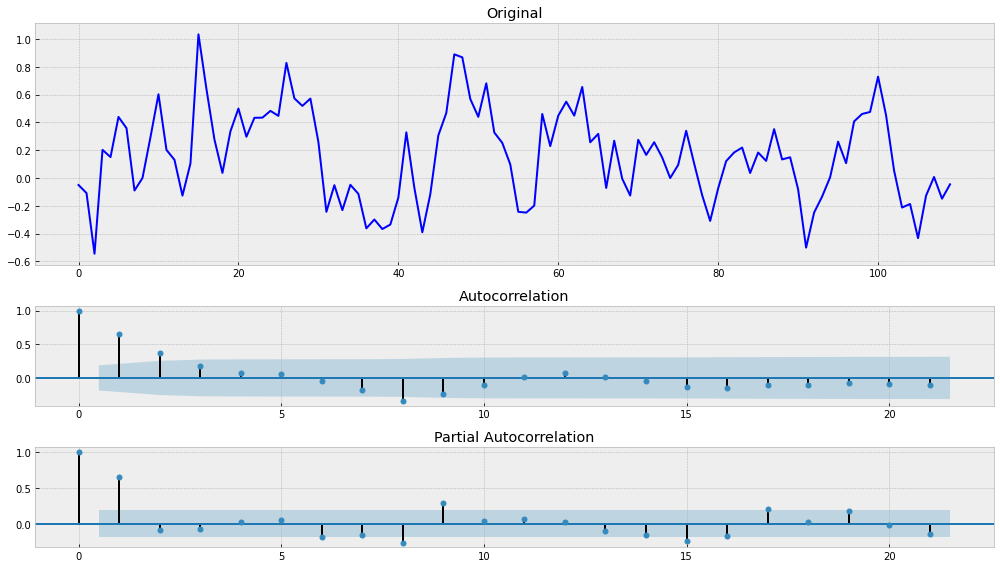

In [27]:
tsplot(series)

Тест Дики-Фуллера подтверждает, что ряд станционарен

## 6. Ряд "weekly-closings-of-the-dowjones-.csv"

In [28]:
series = pd.read_csv("https://raw.githubusercontent.com/ab-kily/netology-hw-ts1/master/Series/weekly-closings-of-the-dowjones-.csv")['Close']

In [29]:
series

0      890.19
1      901.80
2      888.51
3      887.78
4      858.43
        ...  
157    791.77
158    787.23
159    787.94
160    784.57
161    752.58
Name: Close, Length: 162, dtype: float64

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


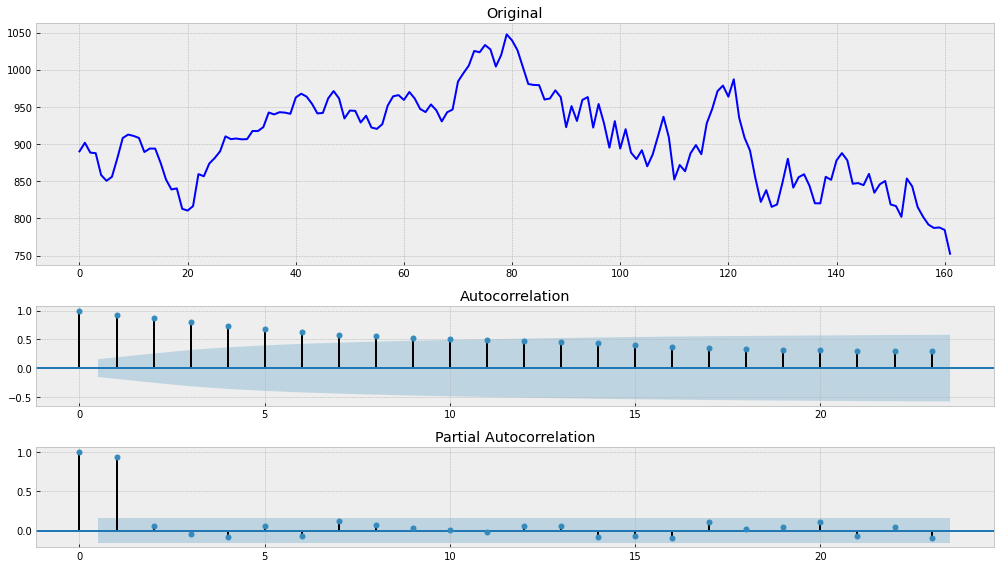

In [30]:
tsplot(series)

In [31]:
series2 = boxcox(series, 0)
series2

array([6.79143492, 6.80439277, 6.7895459 , 6.78872396, 6.75510514,
       6.74595374, 6.75229374, 6.78095546, 6.81140956, 6.81646202,
       6.8145429 , 6.81148664, 6.79044588, 6.7956834 , 6.7956051 ,
       6.77405244, 6.7480207 , 6.73221071, 6.73386607, 6.70065731,
       6.69786107, 6.70508815, 6.75645553, 6.75314616, 6.77285152,
       6.78125057, 6.79144616, 6.81385111, 6.80978958, 6.81062745,
       6.80945864, 6.80978958, 6.82175067, 6.82167438, 6.82740169,
       6.84846165, 6.84574157, 6.84893902, 6.84830247, 6.84662428,
       6.86963796, 6.87494279, 6.8708838 , 6.86084185, 6.84718753,
       6.84782479, 6.86853617, 6.8785839 , 6.86838015, 6.83995812,
       6.85124842, 6.85085683, 6.83414103, 6.84381391, 6.82682718,
       6.82486268, 6.83162989, 6.8583129 , 6.871278  , 6.87298784,
       6.8662664 , 6.87734762, 6.86822412, 6.85354194, 6.8490981 ,
       6.85989818, 6.85156581, 6.83567909, 6.84886478, 6.85268645,
       6.89174784, 6.90300401, 6.91330982, 6.93265275, 6.93091

In [32]:
series3 = series2[9:] - series2[:-9]
series3

array([ 0.0250271 ,  0.01015013,  0.02194074,  0.00172192,  0.04057826,
        0.04965136,  0.0217587 , -0.03293476, -0.07919886, -0.08259595,
       -0.11388559, -0.11362557, -0.08535773, -0.03922787, -0.04245894,
       -0.00120093,  0.03322987,  0.05923545,  0.07998504,  0.10913227,
        0.11276638,  0.1043705 ,  0.05333405,  0.06860451,  0.04882286,
        0.04615112,  0.05701549,  0.03189046,  0.03914944,  0.03767502,
        0.03716563,  0.05984838,  0.05319212,  0.04920943,  0.03344016,
       -0.00127412,  0.00208322,  0.01959714,  0.03028143,  0.02175587,
       -0.02967984, -0.02369437, -0.02002697, -0.02670082, -0.00337362,
       -0.02099761, -0.04367348, -0.04695401, -0.01006725,  0.03131988,
        0.02173942,  0.01540956,  0.04320659,  0.0244102 ,  0.02671476,
        0.02423541,  0.02826829, -0.00674709, -0.03559891, -0.02412306,
       -0.01357995,  0.01440022,  0.03477989,  0.05976789,  0.08355465,
        0.07101683,  0.08884058,  0.09895179,  0.06309166,  0.07

Results of Dickey-Fuller Test:
Test Statistic                  -3.144714
p-value                          0.023416
#Lags Used                      12.000000
Number of Observations Used    140.000000
Critical Value (1%)             -3.477945
Critical Value (5%)             -2.882416
Critical Value (10%)            -2.577902
dtype: float64


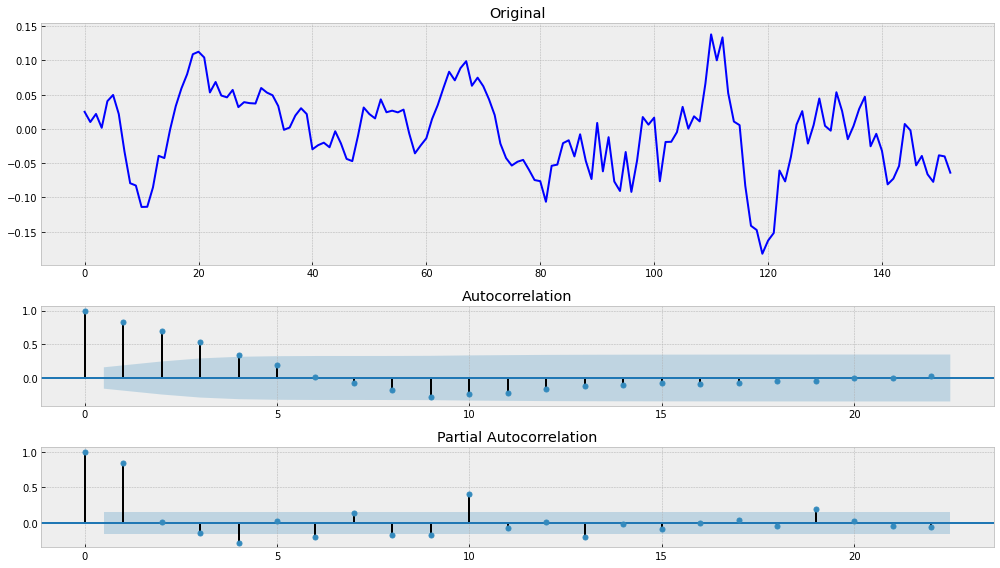

In [33]:
tsplot(series3)

Тест Дики-Фуллера подтверждает, что ряд станционарен